In [141]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

### 1. Points and Weights

In [9]:
def simplexPoints(p):
    swt = np.full((2*p+2, 1), (p * (7 - p)) / (2 * (p + 1) ** 2 * (p + 2)))
    mwt = np.full(((p+1)*p, 1), (2 * (p - 1) ** 2) / (p * (p + 1) ** 2 * (p + 2)))
    wt = np.vstack((swt, mwt))
    v = np.zeros((p+1, p))
    for i in range(p+1):
        for j in range(p):
            if j < i:
                v[i, j] = -1 * np.sqrt((p + 1) / (p * (p - j + 2) * (p - j + 1)))
            elif j == i:
                v[i, j] = np.sqrt((p + 1) * (p - i + 1) / (p * (p - i + 2)))
            else:
                v[i, j] = 0
    m = np.zeros(((p+1)*p // 2, p))
    cCount = 0
    for i in range(p):
        for j in range(i+1, p+1):
            tmp = (v[i] + v[j]) / 2
            d = np.linalg.norm(tmp) 
            m[cCount] = tmp / d
            cCount += 1
    pts = np.vstack((v, -1*v, m, -1*m))
    return np.hstack((pts, wt))
def twoSpherePointsAndWeights(p):
    pt0 = np.zeros((1, p))
    wt0 = 8 / ((p + 2) * (p + 4))
    wt1 = simplexPoints(p)
    wt2 = wt1.copy()
    pt1 = wt1[:, :p]
    wt1 = wt1[:, -1].reshape(-1, 1)
    pt1 *= np.sqrt(p + 4 - np.sqrt(2 * p + 8))
    wt1 *= p * (p + 2) / ((p + 4) * (2 - np.sqrt(2 * p + 8)) ** 2)
    pt2 = wt2[:, :p]
    wt2 = wt2[:, -1].reshape(-1, 1)
    pt2 *= np.sqrt(p + 4 + np.sqrt(2 * p + 8))
    wt2 *= p * (p + 2) / ((p + 4) * (2 + np.sqrt(2 * p + 8)) ** 2)
    wt = np.vstack((wt0, wt1, wt2))
    pt = np.vstack((pt0, pt1, pt2))
    return np.hstack((pt, wt))
priorMean = [-1, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0]
df=17
priorVariance = np.identity(df)
pw = twoSpherePointsAndWeights(df)
wts = pw[0, df]
pts = pw[:, :df].T
pv = np.linalg.cholesky(priorVariance)
pts = np.dot(pv, pts)
for bidx in range(pts.shape[1]):
    pts[:, bidx] += priorMean

### 2. Information matrix and DB 

In [143]:
def InfoMNL(X, b, cset):
    r, c = X.shape
    nchoices = r // cset
    info = np.zeros((c, c))
    
    for i in range(cset):
        xrow = X[i * nchoices : i * nchoices + nchoices, :]
        u = np.dot(xrow, b)
        exp_u = np.exp(u)
        p = exp_u / np.sum(exp_u)
        Pdiag = np.diag(p)
        info += np.dot(xrow.T, (Pdiag - np.outer(p, p)).dot(xrow))
        
    return info

def calcObjFun(xmat, pts, wts, cset):
    nr, _ = pts.shape
    objfun = 0
    
    for idx in range(nr):
        b = pts[:, idx]
        info = InfoMNL(xmat, b, cset)
        det_info = np.linalg.det(info)
        if det_info <= 0:
            objfun = -100000
        else:
            objfun += np.log(det_info) * wts[idx]
            
    return objfun

In [31]:
pts_val=[-1, 2.81041458395174, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -1.2241420343501, -4.81041458395174, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, -0.775857965649897, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, 1.61392283981642, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -1.32674035497705, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -3.61392283981642, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, -0.673259645022947, 4.24220761687363, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -1.30836515393374, -6.24220761687363, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, -0.691634846066257, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, 2.59612475726844, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465856, -1.44951559465855, -1.44951559465855, -1.44951559465856, -1.44951559465856, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465856, -1.44951559465855, -1.44951559465855, -1.44951559465856, -1.44951559465856, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465856, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465855, -1.44951559465856, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -4.59612475726844, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, -0.550484405341445, 0, 0, 3.80381645850973, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, -0.237738528656858, 0, -3.80381645850973, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 0.237738528656858, 2.77248384829888, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, -0.17328024051868, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, 2.5992036077802, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -0.346560481037361, -2.77248384829888, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, 0.17328024051868, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, -2.5992036077802, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0.346560481037361, 0, 5.23313019427639, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, -0.327070637142275, 0, -5.23313019427639, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 0.327070637142275, 3.81426630278601, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, -0.238391643924126, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, 3.57587465886189, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -0.476783287848251, -3.81426630278601, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, 0.238391643924126, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, -3.57587465886189, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, 0.476783287848251, -1, -1, -1, 2.79637986008007, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1.25309199067201, -1, -1, -4.79637986008007, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -0.746908009327995, -1, 1.76706354233581, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, 1.76706354233581, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, -1.18447090282239, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, 1.58259263951342, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1.36894180564477, -1, -3.76706354233581, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -3.76706354233581, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -0.815529097177613, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -3.58259263951342, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -0.631058194355226, -1, -1, 4.22289923591932, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1.34819328239462, -1, -1, -6.22289923591932, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -0.651806717605379, -1, 2.80680927453373, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, 2.80680927453373, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, -1.25378728496892, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, 2.55302198956481, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1.50757456993783, -1, -4.80680927453373, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -4.80680927453373, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -0.746212715031085, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -4.55302198956481, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, -0.492425430062169, 0, 0, 0, 0, 3.78793406572492, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, -0.270566718980351, 0, 0, 0, -3.78793406572492, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0.270566718980351, 0, 0, 2.76090766476097, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, 0, 2.76090766476097, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, 2.76090766476097, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, -0.197207690340069, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, 2.5636999744209, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680139, -0.394415380680138, -0.394415380680138, -0.394415380680139, -0.394415380680139, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680139, -0.394415380680138, -0.394415380680138, -0.394415380680139, -0.394415380680139, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680139, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680138, -0.394415380680139, 0, 0, -2.76090766476097, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0, -2.76090766476097, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, -2.76090766476097, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, 0.197207690340069, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, -2.5636999744209, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680139, 0.394415380680138, 0.394415380680138, 0.394415380680139, 0.394415380680139, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680139, 0.394415380680138, 0.394415380680138, 0.394415380680139, 0.394415380680139, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680139, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680138, 0.394415380680139, 0, 0, 0, 5.2112798683876, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, -0.3722342763134, 0, 0, 0, -5.2112798683876, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0.3722342763134, 0, 0, 3.79834027789298, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, 0, 3.79834027789298, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, 3.79834027789298, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, -0.271310019849499, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, 3.52703025804348, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, -0.542620039698997, 0, 0, -3.79834027789298, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0, -3.79834027789298, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, -3.79834027789298, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, 0.271310019849499, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, -3.52703025804348, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, 0.542620039698997, -1, -1, -1, -1, -1, 2.7782586116966, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1.29063527782282, -1, -1, -1, -1, -4.7782586116966, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -0.709364722177185, -1, -1, -1, 1.75385552638598, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1, -1, 1.75385552638598, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1, 1.75385552638598, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, 1.75385552638598, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, -1.21183504049123, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, 1.54202048589475, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1.42367008098246, -1, -1, -1, -3.75385552638598, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -1, -1, -3.75385552638598, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -1, -3.75385552638598, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -3.75385552638598, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -0.788164959508771, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -3.54202048589475, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -0.576329919017541, -1, -1, -1, -1, 4.19796878695893, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1.399843752843, -1, -1, -1, -1, -6.19796878695893, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -0.600156247157005, -1, -1, -1, 2.78863824345811, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1, -1, 2.78863824345811, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1, 2.78863824345811, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, 2.78863824345811, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, -1.29143371103524, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, 2.49720453242288, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1.58286742207048, -1, -1, -1, -4.78863824345812, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -1, -1, -4.78863824345812, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -1, -4.78863824345812, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -4.78863824345812, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -0.70856628896476, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -4.49720453242288, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -0.417132577929521, -1, -1, -1, -1, -1, -1, 2.76706374675879, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1.31392197889657, -1, -1, -1, -1, -1, -4.76706374675879, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -0.686078021103434, -1, -1, -1, -1, 1.74569593652077, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1, -1, -1, 1.74569593652077, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1, -1, 1.74569593652077, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1, 1.74569593652077, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, 1.74569593652077, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, -1.22880799471006, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, 1.51688794181071, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1.45761598942013, -1, -1, -1, -1, -3.74569593652077, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -1, -1, -1, -3.74569593652077, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -1, -1, -3.74569593652077, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -1, -3.74569593652077, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -3.74569593652077, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -0.771192005289935, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -3.51688794181071, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -0.542384010579871, -1, -1, -1, -1, -1, 4.18256736410746, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1.43188061367562, -1, -1, -1, -1, -1, -6.18256736410746, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -0.568119386324378, -1, -1, -1, -1, 2.77741262398823, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1, -1, -1, 2.77741262398823, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1, -1, 2.77741262398823, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1, 2.77741262398823, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, 2.77741262398823, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, -1.31478438533235, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, 2.46262823865587, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1.6295687706647, -1, -1, -1, -1, -4.77741262398823, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -1, -1, -1, -4.77741262398823, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -1, -1, -4.77741262398823, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -1, -4.77741262398823, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -4.77741262398823, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -0.685215614667648, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -4.46262823865587, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, -0.370431229335296, 0, 0, 0, 0, 0, 0, 0, 3.75396087663551, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, -0.341269170603228, 0, 0, 0, 0, 0, 0, -3.75396087663551, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0.341269170603228, 0, 0, 0, 0, 0, 2.73614566084912, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, 0, 0, 0, 0, 2.73614566084912, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, 0, 0, 0, 2.73614566084912, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, 0, 0, 2.73614566084912, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, 0, 2.73614566084912, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, 2.73614566084912, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, -0.248740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, 2.48740514622647, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, -0.497481029245294, 0, 0, 0, 0, 0, -2.73614566084912, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0, 0, 0, 0, -2.73614566084912, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0, 0, 0, -2.73614566084912, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0, 0, -2.73614566084912, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0, -2.73614566084912, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, -2.73614566084912, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, 0.248740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, -2.48740514622647, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0.497481029245294, 0, 0, 0, 0, 0, 0, 5.16454098822373, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, -0.469503726202157, 0, 0, 0, 0, 0, 0, -5.16454098822373, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0.469503726202157, 0, 0, 0, 0, 0, 3.76427375766117, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, 0, 0, 0, 0, 3.76427375766117, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, 0, 0, 0, 3.76427375766117, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, 0, 0, 3.76427375766117, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, 0, 3.76427375766117, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, 3.76427375766117, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, -0.342206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, 3.42206705241925, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, -0.684413410483849, 0, 0, 0, 0, 0, -3.76427375766117, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0, 0, 0, 0, -3.76427375766117, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0, 0, 0, -3.76427375766117, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0, 0, -3.76427375766117, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0, -3.76427375766117, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, -3.76427375766117, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, 0.342206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, -3.42206705241925, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0.684413410483849, 0, 0, 0, 0, 0, 0, 0, 0, 3.73841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, -0.373841645840934, 0, 0, 0, 0, 0, 0, 0, -3.73841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0.373841645840934, 0, 0, 0, 0, 0, 0, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 0, 0, 0, 0, 0, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 0, 0, 0, 0, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 0, 0, 0, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 0, 0, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 0, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 2.72481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, -0.272481581648535, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, 2.45233423483681, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, -0.544963163297069, 0, 0, 0, 0, 0, 0, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0, 0, 0, 0, 0, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0, 0, 0, 0, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0, 0, 0, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0, 0, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, -2.72481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, 0.272481581648535, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, -2.45233423483681, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0.544963163297069, 0, 0, 0, 0, 0, 0, 0, 5.14315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, -0.514315563347302, 0, 0, 0, 0, 0, 0, 0, -5.14315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0.514315563347302, 0, 0, 0, 0, 0, 0, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 0, 0, 0, 0, 0, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 0, 0, 0, 0, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 0, 0, 0, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 0, 0, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 0, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 3.74868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, -0.374868663581047, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, 3.37381797222942, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, -0.749737327162094, 0, 0, 0, 0, 0, 0, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0, 0, 0, 0, 0, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0, 0, 0, 0, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0, 0, 0, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0, 0, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, -3.74868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, 0.374868663581047, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, -3.37381797222942, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, 0.749737327162094, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2.71967741078991, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1.41329749008777, -1, -1, -1, -1, -1, -1, -1, -1, -4.71967741078991, -0.586702509912232, -0.586702509912232, -0.586702509912232, -0.586702509912232, -0.586702509912232, -0.586702509912232, -0.586702509912232, -0.586702509912232, -0.586702509912232, -1, -1, -1, -1, -1, -1, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1, -1, -1, -1, -1, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1, -1, -1, -1, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1, -1, -1, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1, -1, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, 1.71115750583234, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, -1.30123972287026, 1.40991778296208, 1.40991778296208, 1.40991778296208, 1.40991778296208, 1.40991778296208, 1.40991778296208, 1.40991778296208, 1.40991778296208, 1.40991778296208, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1.60247944574052, -1, -1, -1, -1, -1, -1, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -1, -1, -1, -1, -1, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -1, -1, -1, -1, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -1, -1, -1, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -1, -1, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -1, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -1, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -3.71115750583234, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -0.69876027712974, -3.40991778296208, -3.40991778296208, -3.40991778296208, -3.40991778296208, -3.40991778296208, -3.40991778296208, -3.40991778296208, -3.40991778296208, -3.40991778296208, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -0.397520554259481, -1, -1, -1, -1, -1, -1, -1, -1, 4.11737524238979, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1.56859724915442, -1, -1, -1, -1, -1, -1, -1, -1, -6.11737524238979, -0.431402750845579, -0.431402750845579, -0.431402750845579, -0.431402750845579, -0.431402750845579, -0.431402750845579, -0.431402750845579, -0.431402750845579, -0.431402750845579, -1, -1, -1, -1, -1, -1, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1, -1, -1, -1, -1, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1, -1, -1, -1, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1, -1, -1, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1, -1, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, 2.7298961082809, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, -1.4144329009201, 2.3154632073608, 2.3154632073608, 2.3154632073608, 2.3154632073608, 2.3154632073608, 2.3154632073608, 2.3154632073608, 2.3154632073608, 2.3154632073608, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1.8288658018402, -1, -1, -1, -1, -1, -1, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -1, -1, -1, -1, -1, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -1, -1, -1, -1, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -1, -1, -1, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -1, -1, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -1, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -1, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -4.7298961082809, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -0.585567099079901, -4.3154632073608, -4.3154632073608, -4.3154632073608, -4.3154632073608, -4.3154632073608, -4.3154632073608, -4.3154632073608, -4.3154632073608, -4.3154632073608, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, -0.171134198159801, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.69664513106518, -0.462080641383147, -0.462080641383147, -0.462080641383147, -0.462080641383147, -0.462080641383147, -0.462080641383147, -0.462080641383147, -0.462080641383147, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.69664513106518, 0.462080641383147, 0.462080641383147, 0.462080641383147, 0.462080641383147, 0.462080641383147, 0.462080641383147, 0.462080641383147, 0.462080641383147, 0, 0, 0, 0, 0, 0, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 0, 0, 0, 0, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 0, 0, 0, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 0, 0, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 0, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 0, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 2.69436999144439, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, -0.336796248930549, 2.35757374251385, 2.35757374251385, 2.35757374251385, 2.35757374251385, 2.35757374251385, 2.35757374251385, 2.35757374251385, 2.35757374251385, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, -0.673592497861099, 0, 0, 0, 0, 0, 0, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, 0, 0, 0, 0, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, 0, 0, 0, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, 0, 0, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, 0, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, -2.69436999144439, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, 0.336796248930549, -2.35757374251385, -2.35757374251385, -2.35757374251385, -2.35757374251385, -2.35757374251385, -2.35757374251385, -2.35757374251385, -2.35757374251385, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0.673592497861099, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.08568840371468, -0.635711050464335, -0.635711050464335, -0.635711050464335, -0.635711050464335, -0.635711050464335, -0.635711050464335, -0.635711050464335, -0.635711050464335, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5.08568840371468, 0.635711050464335, 0.635711050464335, 0.635711050464335, 0.635711050464335, 0.635711050464335, 0.635711050464335, 0.635711050464335, 0.635711050464335, 0, 0, 0, 0, 0, 0, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 0, 0, 0, 0, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 0, 0, 0, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 0, 0, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 0, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 0, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 3.70680055427911, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, -0.463350069284889, 3.24345048499422, 3.24345048499422, 3.24345048499422, 3.24345048499422, 3.24345048499422, 3.24345048499422, 3.24345048499422, 3.24345048499422, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, -0.926700138569778, 0, 0, 0, 0, 0, 0, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, 0, 0, 0, 0, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, 0, 0, 0, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, 0, 0, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, 0, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, -3.70680055427911, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, 0.463350069284889, -3.24345048499422, -3.24345048499422, -3.24345048499422, -3.24345048499422, -3.24345048499422, -3.24345048499422, -3.24345048499422, -3.24345048499422, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0.926700138569778, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.66765138827109, -0.523950198324441, -0.523950198324441, -0.523950198324441, -0.523950198324441, -0.523950198324441, -0.523950198324441, -0.523950198324441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.66765138827109, 0.523950198324441, 0.523950198324441, 0.523950198324441, 0.523950198324441, 0.523950198324441, 0.523950198324441, 0.523950198324441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 0, 0, 0, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 0, 0, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 0, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 0, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 2.67323735150891, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, -0.381891050215559, 2.29134630129335, 2.29134630129335, 2.29134630129335, 2.29134630129335, 2.29134630129335, 2.29134630129335, 2.29134630129335, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, -0.763782100431118, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, 0, 0, 0, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, 0, 0, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, 0, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, -2.67323735150891, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, 0.381891050215559, -2.29134630129335, -2.29134630129335, -2.29134630129335, -2.29134630129335, -2.29134630129335, -2.29134630129335, -2.29134630129335, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0.763782100431118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.04580003567279, -0.720828576524684, -0.720828576524684, -0.720828576524684, -0.720828576524684, -0.720828576524684, -0.720828576524684, -0.720828576524684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5.04580003567279, 0.720828576524684, 0.720828576524684, 0.720828576524684, 0.720828576524684, 0.720828576524684, 0.720828576524684, 0.720828576524684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 0, 0, 0, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 0, 0, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 0, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 0, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 3.67772715987709, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, -0.525389594268156, 3.15233756560894, 3.15233756560894, 3.15233756560894, 3.15233756560894, 3.15233756560894, 3.15233756560894, 3.15233756560894, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, -1.05077918853631, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, 0, 0, 0, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, 0, 0, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, 0, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, -3.67772715987709, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, 0.525389594268156, -3.15233756560894, -3.15233756560894, -3.15233756560894, -3.15233756560894, -3.15233756560894, -3.15233756560894, -3.15233756560894, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 1.05077918853631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.63003345653489, -0.605005576089148, -0.605005576089148, -0.605005576089148, -0.605005576089148, -0.605005576089148, -0.605005576089148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.63003345653489, 0.605005576089148, 0.605005576089148, 0.605005576089148, 0.605005576089148, 0.605005576089148, 0.605005576089148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 0, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 0, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 2.64581880771674, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, -0.440969801286124, 2.20484900643062, 2.20484900643062, 2.20484900643062, 2.20484900643062, 2.20484900643062, 2.20484900643062, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, -0.881939602572247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, 0, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, -2.64581880771674, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, 0.440969801286124, -2.20484900643062, -2.20484900643062, -2.20484900643062, -2.20484900643062, -2.20484900643062, -2.20484900643062, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0.881939602572247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.99404687235321, -0.832341145392202, -0.832341145392202, -0.832341145392202, -0.832341145392202, -0.832341145392202, -0.832341145392202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4.99404687235321, 0.832341145392202, 0.832341145392202, 0.832341145392202, 0.832341145392202, 0.832341145392202, 0.832341145392202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 0, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 0, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 3.64000588416178, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, -0.606667647360296, 3.03333823680148, 3.03333823680148, 3.03333823680148, 3.03333823680148, 3.03333823680148, 3.03333823680148, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, -1.21333529472059, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, 0, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, -3.64000588416178, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, 0.606667647360296, -3.03333823680148, -3.03333823680148, -3.03333823680148, -3.03333823680148, -3.03333823680148, -3.03333823680148, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, 1.21333529472059, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2.57926125736354, -1.71585225147271, -1.71585225147271, -1.71585225147271, -1.71585225147271, -1.71585225147271, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4.57926125736354, -0.284147748527291, -0.284147748527291, -0.284147748527291, -0.284147748527291, -0.284147748527291, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, 1.60881252634629, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, -1.52176250526926, 1.08705002107703, 1.08705002107703, 1.08705002107703, 1.08705002107703, 1.08705002107703, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -2.04352501053852, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -1, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -3.60881252634629, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -0.478237494730742, -3.08705002107703, -3.08705002107703, -3.08705002107703, -3.08705002107703, -3.08705002107703, 0.0435250105385161, 0.0435250105385161, 0.0435250105385161, 0.0435250105385161, 0.0435250105385163, 0.0435250105385161, 0.0435250105385161, 0.0435250105385161, 0.0435250105385161, 0.0435250105385163, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3.92419662289679, -1.98483932457936, -1.98483932457936, -1.98483932457936, -1.98483932457936, -1.98483932457936, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -5.92419662289679, -0.0151606754206429, -0.0151606754206429, -0.0151606754206429, -0.0151606754206429, -0.0151606754206429, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, 2.58909420360886, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, -1.71781884072177, 1.87127536288708, 1.87127536288708, 1.87127536288708, 1.87127536288708, 1.87127536288708, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -2.43563768144354, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -1, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -4.58909420360886, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -0.282181159278229, -3.87127536288708, -3.87127536288708, -3.87127536288708, -3.87127536288708, -3.87127536288708, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0.435637681443542, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.50694549466129, -0.876736373665322, -0.876736373665322, -0.876736373665322, -0.876736373665322, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.50694549466129, 0.876736373665322, 0.876736373665322, 0.876736373665322, 0.876736373665322, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 0, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 2.5561038096518, -0.639025952412951, -0.639025952412951, -0.639025952412951, -0.639025952412951, 1.91707785723885, 1.91707785723885, 1.91707785723885, 1.91707785723885, -1.2780519048259, -1.2780519048259, -1.2780519048259, -1.2780519048259, -1.2780519048259, -1.2780519048259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, -2.5561038096518, 0.639025952412951, 0.639025952412951, 0.639025952412951, 0.639025952412951, -1.91707785723885, -1.91707785723885, -1.91707785723885, -1.91707785723885, 1.2780519048259, 1.2780519048259, 1.2780519048259, 1.2780519048259, 1.2780519048259, 1.2780519048259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.8247076476933, -1.20617691192332, -1.20617691192332, -1.20617691192332, -1.20617691192332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4.8247076476933, 1.20617691192332, 1.20617691192332, 1.20617691192332, 1.20617691192332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 0, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 3.51657977504898, -0.879144943762245, -0.879144943762245, -0.879144943762245, -0.879144943762245, 2.63743483128673, 2.63743483128673, 2.63743483128673, 2.63743483128673, -1.75828988752449, -1.75828988752449, -1.75828988752449, -1.75828988752449, -1.75828988752449, -1.75828988752449, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, -3.51657977504898, 0.879144943762245, 0.879144943762245, 0.879144943762245, 0.879144943762245, -2.63743483128673, -2.63743483128673, -2.63743483128673, -2.63743483128673, 1.75828988752449, 1.75828988752449, 1.75828988752449, 1.75828988752449, 1.75828988752449, 1.75828988752449, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.39558537422007, -1.13186179140669, -1.13186179140669, -1.13186179140669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.39558537422007, 1.13186179140669, 1.13186179140669, 1.13186179140669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 0, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 2.47493687148969, -0.824978957163231, -0.824978957163231, -0.824978957163231, 1.64995791432646, 1.64995791432646, 1.64995791432646, -1.64995791432646, -1.64995791432646, -1.64995791432646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, 0, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, -2.47493687148969, 0.824978957163231, 0.824978957163231, 0.824978957163231, -1.64995791432646, -1.64995791432646, -1.64995791432646, 1.64995791432646, 1.64995791432646, 1.64995791432646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.67150309245893, -1.55716769748631, -1.55716769748631, -1.55716769748631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4.67150309245893, 1.55716769748631, 1.55716769748631, 1.55716769748631, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 0, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 3.40491372609363, -1.13497124203121, -1.13497124203121, -1.13497124203121, 2.26994248406242, 2.26994248406242, 2.26994248406242, -2.26994248406242, -2.26994248406242, -2.26994248406242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, 0, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, -3.40491372609363, 1.13497124203121, 1.13497124203121, 1.13497124203121, -2.26994248406242, -2.26994248406242, -2.26994248406242, 2.26994248406242, 2.26994248406242, 2.26994248406242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.2013885922785, -1.60069429613925, -1.60069429613925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.2013885922785, 1.60069429613925, 1.60069429613925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 0, 2.33339285978531, -1.16669642989265, -1.16669642989265, 2.33339285978531, -1.16669642989265, -1.16669642989265, 1.16669642989265, 1.16669642989265, -2.33339285978531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, 0, -2.33339285978531, 1.16669642989265, 1.16669642989265, -2.33339285978531, 1.16669642989265, 1.16669642989265, -1.16669642989265, -1.16669642989265, 2.33339285978531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.40433535334884, -2.20216767667442, -2.20216767667442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -4.40433535334884, 2.20216767667442, 2.20216767667442, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 0, 3.21018344676795, -1.60509172338397, -1.60509172338397, 3.21018344676795, -1.60509172338397, -1.60509172338397, 1.60509172338397, 1.60509172338397, -3.21018344676795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, 0, -3.21018344676795, 1.60509172338397, 1.60509172338397, -3.21018344676795, 1.60509172338397, 1.60509172338397, -1.60509172338397, -1.60509172338397, 3.21018344676795, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.77248384829888, -2.77248384829888, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.77248384829888, 2.77248384829888, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 0, 2.0207774935833, -2.0207774935833, 0, 0, 2.0207774935833, -2.0207774935833, 0, 2.0207774935833, -2.0207774935833, 2.0207774935833, -2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, 0, -2.0207774935833, 2.0207774935833, 0, 0, -2.0207774935833, 2.0207774935833, 0, -2.0207774935833, 2.0207774935833, -2.0207774935833, 2.0207774935833, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.81426630278601, -3.81426630278601, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.81426630278601, 3.81426630278601, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 0, 2.78010041570933, -2.78010041570933, 0, 0, 2.78010041570933, -2.78010041570933, 0, 2.78010041570933, -2.78010041570933, 2.78010041570933, -2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, 0, -2.78010041570933, 2.78010041570933, 0, 0, -2.78010041570933, 2.78010041570933, 0, -2.78010041570933, 2.78010041570933, -2.78010041570933, 2.78010041570933, 0 ]

In [33]:
pts=np.reshape(pts_val, (17, 685))

In [24]:
wts=[0.0200501253132832, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, -0.0105780086624942, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, 0.00374805566449621, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, -0.00295281319396633, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312, 0.00104625630125312]

In [95]:
nlevels=[3, 3, 2, 4, 5, 6]

### Random starting points

In [137]:
def generate_random_data_for_category(nlevels):
        return np.random.choice(range(1, nlevels+1), size=(cset*j))
def random_start_category (cset,j,nlevels):
    data = []
    for level in nlevels:
        data.append(generate_random_data_for_category(level))
    return data
def random_start_dummy (X):
    data_df = pd.DataFrame(np.array(X).T)
    for col, level in zip(data_df.columns, nlevels):
        data_df[col] = pd.Categorical(data_df[col], categories=range(1, level + 1))
    dummy_data = pd.get_dummies(data_df, columns=data_df.columns, drop_first=True, dtype=int)
    return dummy_data.to_numpy()

### Random change to next level

In [72]:
def change_to_adjacent_level(cat_var_value, levels):
    if cat_var_value == 1:
        return cat_var_value + 1
    elif cat_var_value == nlevels:
        return cat_var_value - 1
    else:
        return cat_var_value + np.random.choice([-1, 1])




### 3. SA

In [139]:
def Bayesian_D_optimal_SA(cset,j,nlevels, pts, wts, initial_temp, final_temp,cooling_rate):
    start_time = time.time()
    result_df = pd.DataFrame()
    result_df = pd.DataFrame()
    prob_df = pd.DataFrame()
    current_category = random_start_category (cset,j,nlevels)
    current_X = random_start_dummy(current_category)
    current_D = calcObjFun(current_X, pts, wts, cset)
    temp = initial_temp
    while temp > final_temp:
      new_category=[]
      for arr, lvl in zip(current_category, nlevels):
          new_arr = np.array([change_to_adjacent_level(val, lvl) for val in arr])
          new_category.append(new_arr)
      new_X = random_start_dummy(new_category)
      new_D = calcObjFun(new_X, pts, wts, cset)
      if new_D >= current_D:
           current_category = new_category
           current_D = new_D
      elif np.random.rand() < np.exp((new_D-current_D) / temp):
           prob = np.exp((new_D-current_D) / temp)
           p_df = pd.DataFrame({'prob': [prob]})
           prob_df = pd.concat([prob_df, p_df], ignore_index=True)
           current_df = new_df
           current_D = new_D
      D_df = pd.DataFrame({'D_value': [current_D]})
      result_df = pd.concat([result_df, D_df], ignore_index=True)
      temp *= cooling_rate
    end_time = time.time()
    total_time = end_time - start_time
    return current_df, current_D,result_df,prob_df,total_time 

### 24 CS

### cooling rate = 0.99

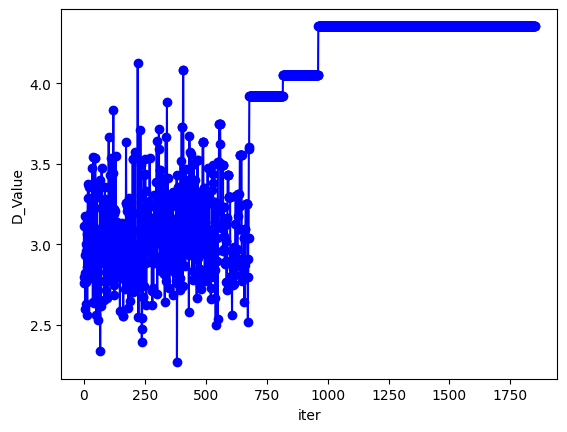

In [151]:
df_SA_24,D_SA_24,result_SA_24,prob_df_SA_24,total_time_SA_24= Bayesian_D_optimal_SA(cset,j,nlevels, pts, wts, 120, 0.000001,0.99)
result_SA_24['D_value'].plot(marker='o', color='blue')
plt.xlabel('iter')
plt.ylabel('D_Value')
plt.show()

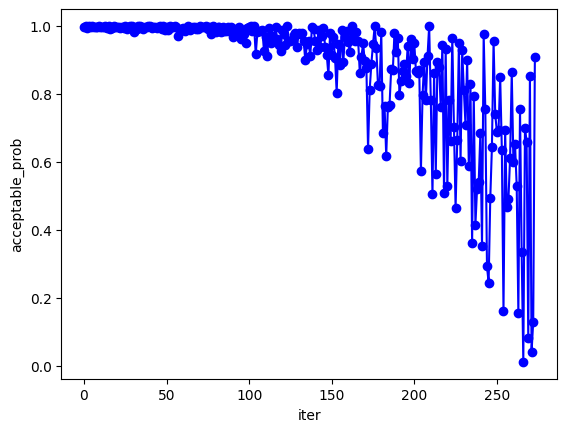

In [152]:
prob_df_SA_24['prob'].plot(marker='o', color='blue')
plt.xlabel('iter')
plt.ylabel('acceptable_prob')
plt.show()

In [153]:
total_time_SA_24

37.508999824523926

### cooling rate = 0.9999

In [ ]:
df_SA_24_L,D_SA_24_L,result_SA_24_L,prob_df_SA_24_L,total_time_SA_24_L= Bayesian_D_optimal_SA(cset,j,nlevels, pts, wts, 120, 0.000001,0.9999)
result_SA_24_L['D_value'].plot(marker='o', color='blue')
plt.xlabel('iter')
plt.ylabel('D_Value')
plt.show()

In [ ]:
prob_df_SA_24_L['prob'].plot(marker='o', color='blue')
plt.xlabel('iter')
plt.ylabel('acceptable_prob')
plt.show()